In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Connect SQLite database with create_engine()

engine = create_engine('sqlite:///hawaii.sqlite')

In [7]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB+\
# # 1. Use an SQLAlchemy Session to query our database

session = Session(engine)


# Exploratory Climate Analysis

## 9.2.1 Retrieve the Precipitation Data

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 

prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

rersults = []

# Save the query results as a Pandas DataFrame and set the index to the date column

results = session.query(Measurement.date, Measurement.prcp)

# print(results.all())

# Sort the dataframe by date

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
# print(results.all())


# Use Pandas Plotting with Matplotlib to plot the data

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

# 9.2.2 Save Query Results

## Saving as a DataFrame

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df = pd.DataFrame(results, columns=['date','precipition'])


In [22]:
df.set_index(df['date'], inplace=True)
# print(df) - will include two date columns which can be confusing, to get around this we'll use the following print
# statement to change to a String:

print(df.to_string(index=False))

      date  precipition
2016-08-23         0.00
2016-08-24         0.08
2016-08-25         0.08
2016-08-26         0.00
2016-08-27         0.00
2016-08-28         0.01
2016-08-29         0.00
2016-08-30         0.00
2016-08-31         0.13
2016-09-01         0.00
2016-09-02         0.00
2016-09-03         0.00
2016-09-04         0.03
2016-09-05          NaN
2016-09-06          NaN
2016-09-07         0.05
2016-09-08         0.00
2016-09-09         0.03
2016-09-10         0.00
2016-09-11         0.05
2016-09-12         0.00
2016-09-13         0.02
2016-09-14         1.32
2016-09-15         0.42
2016-09-16         0.06
2016-09-17         0.05
2016-09-18         0.00
2016-09-19         0.00
2016-09-20         0.00
2016-09-21         0.00
2016-09-22         0.02
2016-09-23         0.00
2016-09-24         0.00
2016-09-25         0.00
2016-09-26         0.06
2016-09-27         0.02
2016-09-28         0.00
2016-09-29         0.00
2016-09-30         0.00
2016-10-01         0.00
2016-10-02      

## 9.2.3 Sorting the DataFrame

In [24]:
# Sorting the Data

df = df.sort_index()

print(print(df.to_string(index=False)))


      date  precipition
2016-08-23         0.00
2016-08-23          NaN
2016-08-23         1.79
2016-08-23         0.05
2016-08-23         0.15
2016-08-23         0.70
2016-08-23         0.02
2016-08-24         0.08
2016-08-24         2.15
2016-08-24         2.28
2016-08-24          NaN
2016-08-24         1.45
2016-08-24         1.22
2016-08-24         2.15
2016-08-25         0.08
2016-08-25         0.00
2016-08-25         0.21
2016-08-25         0.06
2016-08-25         0.00
2016-08-25         0.11
2016-08-25         0.08
2016-08-26         0.03
2016-08-26         0.01
2016-08-26         0.00
2016-08-26         0.04
2016-08-26         0.02
2016-08-26         0.00
2016-08-27         0.18
2016-08-27         0.12
2016-08-27         0.00
2016-08-27         0.00
2016-08-27         0.02
2016-08-27          NaN
2016-08-28         0.60
2016-08-28         0.14
2016-08-28         0.01
2016-08-28         0.14
2016-08-28         0.14
2016-08-28         2.07
2016-08-29         0.00
2016-08-29      

## 9.2.4 Plotting the Data

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

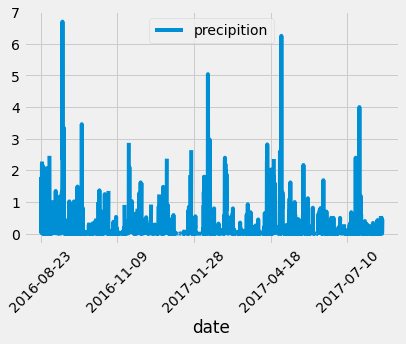

In [31]:
df.plot()
plt.xticks(rotation=45)

## 9.2.5 Generate the Summary

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipition
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## 9.3.1 Find the Number of Stations

In [33]:
# How many stations are available in this dataset?

# Begin by adding the starting point for our query, which is the following line:

    # session.query()

# Continuing with our query, we'll use (func.count), which essentially counts a given dataset we are interested in. 
# In this case, we want to count the total number of stations. We can do this by referencing (Station.station), 
# which will give us the number of stations. Add the query parameters to your code, like this:

    # session.query(func.count(Station.station))

# Now we need to add the (.all() )function to the end of this query so that our results are returned as a list. 
# Your final query should look like the following:

session.query(func.count(Station.station)).all()



[(9,)]

# 9.3.2 Determine the Most Active Stations

## Determining how active the stations are will tell us how much data has been collected from each station.

## In this case, active essentially means the number of recordings for each station.

In [37]:
# What are the most active stations?

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

## 9.3.3 Find Low, High and Average Temperatures

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

    # session.query()

# Next, we will calculate the minimum, maximum, and average temperatures with the following functions: 
# (func.min, func.max, and func.avg). Add these functions to your query, like this:

    # session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
    
# Wtith the minimum, maximum, and average in our query, we now need to add one filter. 
# We'll be filtering out everything but the station W. Avy is interested in. 
# If you look at the outcome of the previous query, you can see that the most active station is USC00519281. 
# Therefore, we will need to add this station ID to our filter below.

     # session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
     # filter(Measurement.station == 'USC00519281')

# Finally, add the (.all() ) function to return our results as a list. Here's what your final query should look like:

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

## Results show the following data:

1. The low (minimum) temperature is 54 degrees
2. The high (maximum) temperature is 85 degrees
3. The average temperature is approximately 71.7 degrees

## 9.3.4 Plot the Highest Number of Observations


In [44]:
# Choose the station with the highest number of temperature observations.

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# print(results)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Convert the above code into a DataFrame to make easier to read

df = pd.DataFrame(results, columns=['tobs'])
# print(df) - will add the index columns to remove that will create a string and use index=False statement

print(df.to_string(index=False))


 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

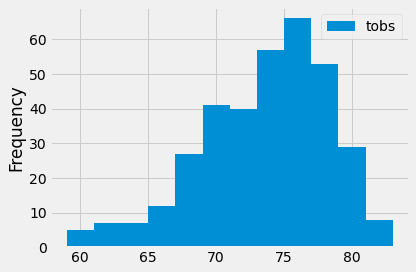

In [45]:
# Plot the Temperature Observations
    # A (histogram) is a graph made up of a range of data that is separated into different bins.
# To create the histogram, we need to use the plot() function and the hist() function and add the 
# number of http://localhost:8888/notebooks/Desktop/UT%3ABootcamp/surfs_up/climate_analysis.ipynb#bins as a parameter. Add the following to your code:

df.plot.hist(bins=12)
plt.tight_layout()


### Looking at this plot, we can infer that:

1. A vast majority of the observations were over 67 degrees.
2. If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed


In [51]:
# Skill Drill - Adjust the bins to 5 & 20

<AxesSubplot:ylabel='Frequency'>

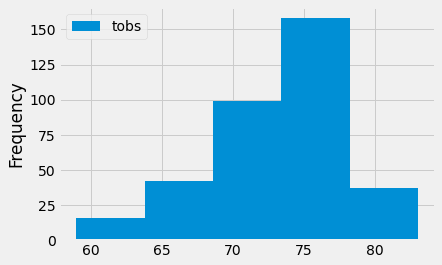

In [52]:
df.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

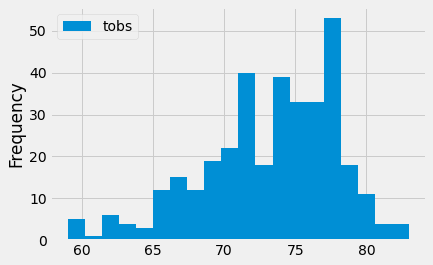

In [53]:
df.plot.hist(bins=20)

## 9.4.1 Incorporate Flask into Data Analysis


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge